In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data-employee-recruitment.csv")

In [ ]:
df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


A company is looking for potential candidates from a pool of training program attendants. The dataset contains attendant background (demographics, current company, i.e., data features) and whether he or she is looing for a job change (data label). The company wants to build a prediction model using this dataset. Here follows the data dictionary:

* enrollee_id : unique ID for candidate
* city_development_index : developement index of the city (scaled)
* gender: gender of candidate
* relevent_experience: relevant experience of candidate
* enrolled_university: type of university course enrolled if any
* education_level: education level of candidate
* major_discipline: education major discipline of candidate
* experience: candidate's total experience in years
* company_size: number of employees in the current company of candidate
* company_type : Type of current employer
* last_new_job: difference in years between previous job and current job
* training_hours: training hours completed
* target value: 0 – not looking for job change, 1 – looking for a job change

# Exploratory Data Analysis

In [ ]:
data=df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2135 non-null   int64  
 1   city_development_index  2135 non-null   float64
 2   gender                  2135 non-null   object 
 3   relevent_experience     2135 non-null   object 
 4   enrolled_university     2135 non-null   object 
 5   education_level         2135 non-null   object 
 6   major_discipline        2135 non-null   object 
 7   experience              2135 non-null   object 
 8   company_size            2135 non-null   object 
 9   company_type            2135 non-null   object 
 10  last_new_job            2135 non-null   object 
 11  training_hours          2135 non-null   int64  
 12  target                  2135 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 217.0+ KB


In [ ]:
print("Continuous Columns")
numerical_cols = data.describe().columns
print(numerical_cols)
print("Categorical Columns")
categorical_cols = data.describe(include=[object]).columns
print(categorical_cols)

Continuous Columns
Index(['enrollee_id', 'city_development_index', 'training_hours', 'target'], dtype='object')
Categorical Columns
Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


In [ ]:
# Drop the enrollee_id column
data.drop(columns=["enrollee_id"], inplace=True)

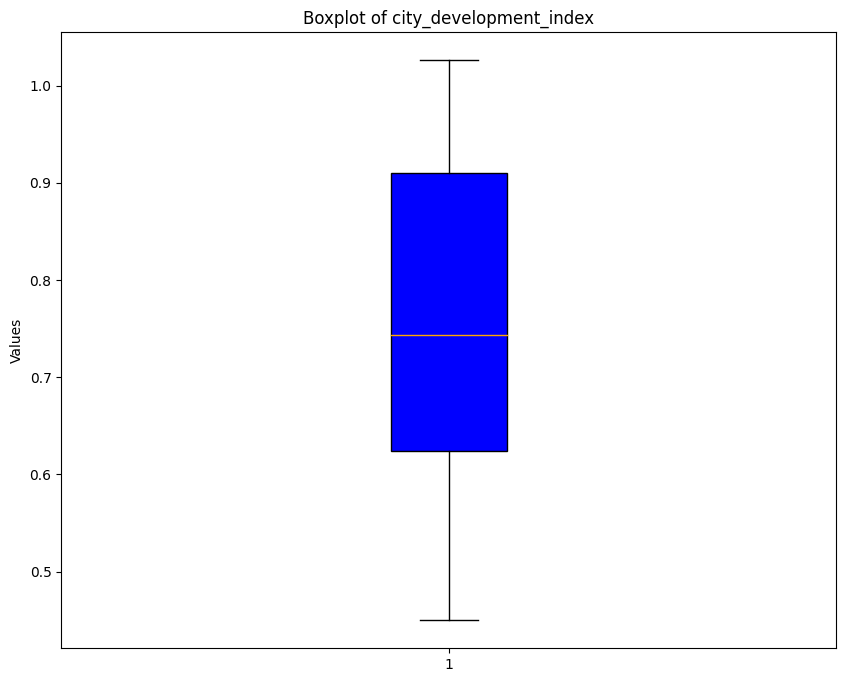

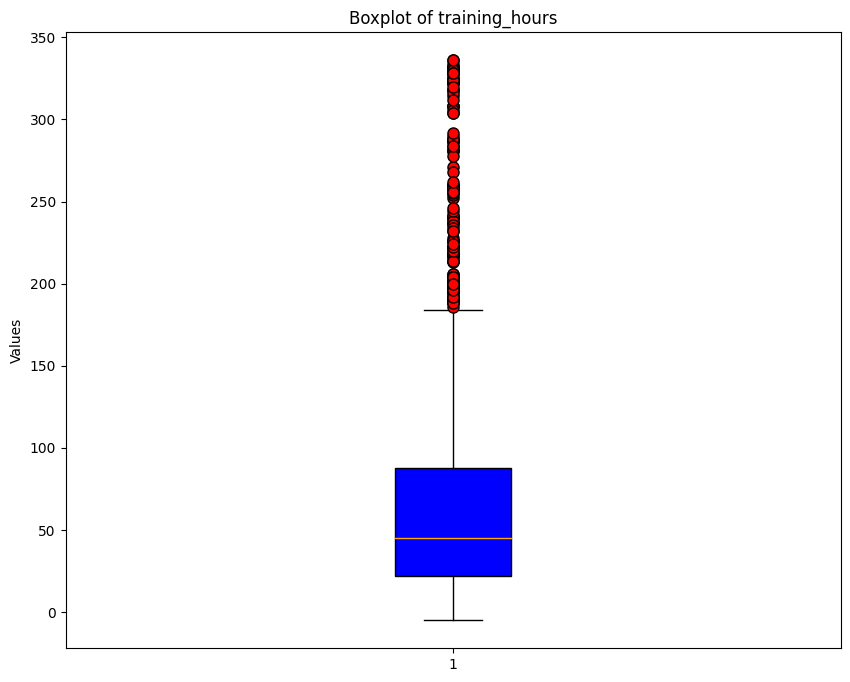

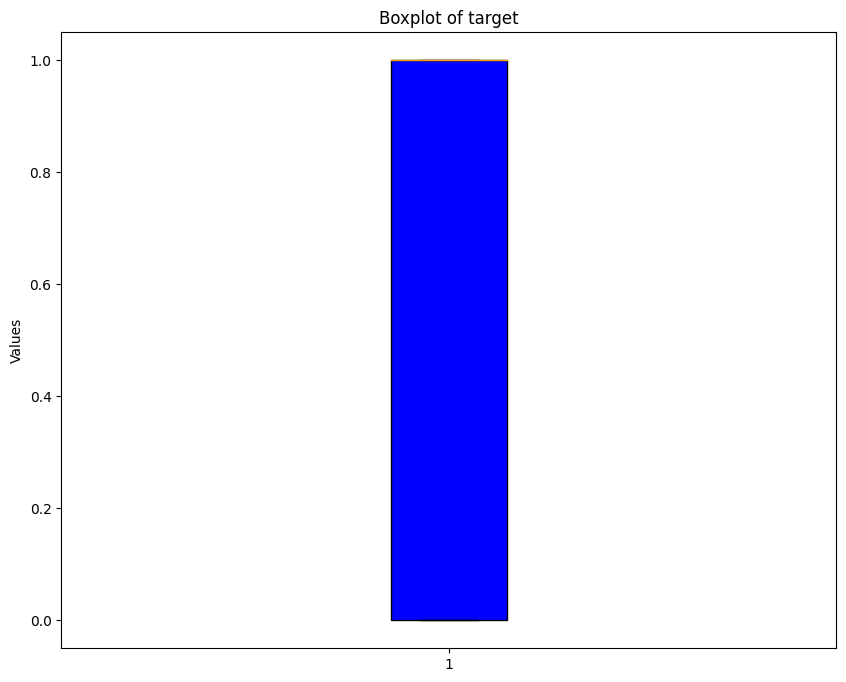

In [ ]:
numerical_col = ['city_development_index', 'training_hours', 'target']
# Plot the boxplot for numerical attribute
for col in numerical_col:
  plt.figure(figsize=(10, 8))
  plt.boxplot(data[col],
            showfliers=True,  # Show outliers
            patch_artist=True,  # Fill box with color
            boxprops=dict(facecolor='blue'),  # Box color
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outlier properties
            medianprops=dict(color='orange'),  # Median line color
            )
  plt.title('Boxplot of {}'.format(col))
  plt.ylabel('Values')
  plt.grid(False)
  plt.show()

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'training_hours'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

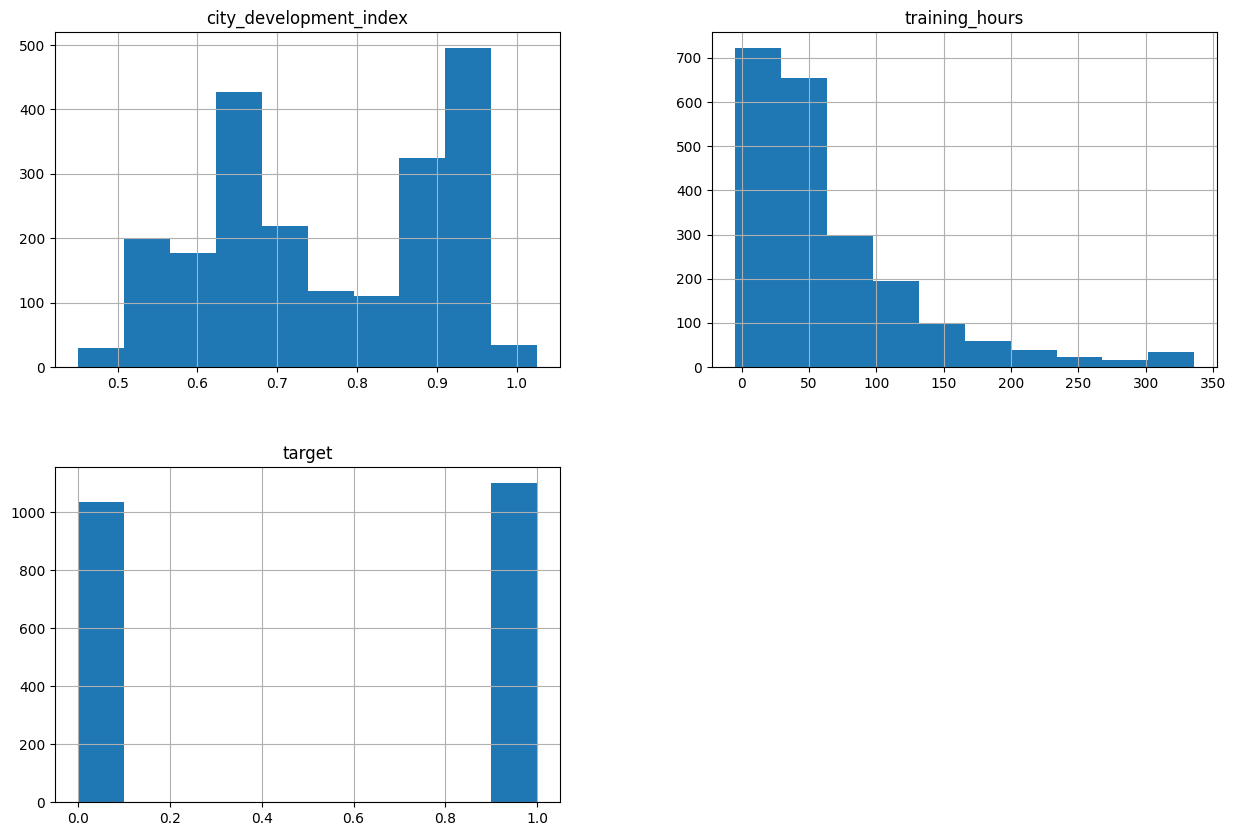

In [ ]:
data.hist(figsize=(15,10))

<ipython-input-51-aa2679017671>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt='.5f')


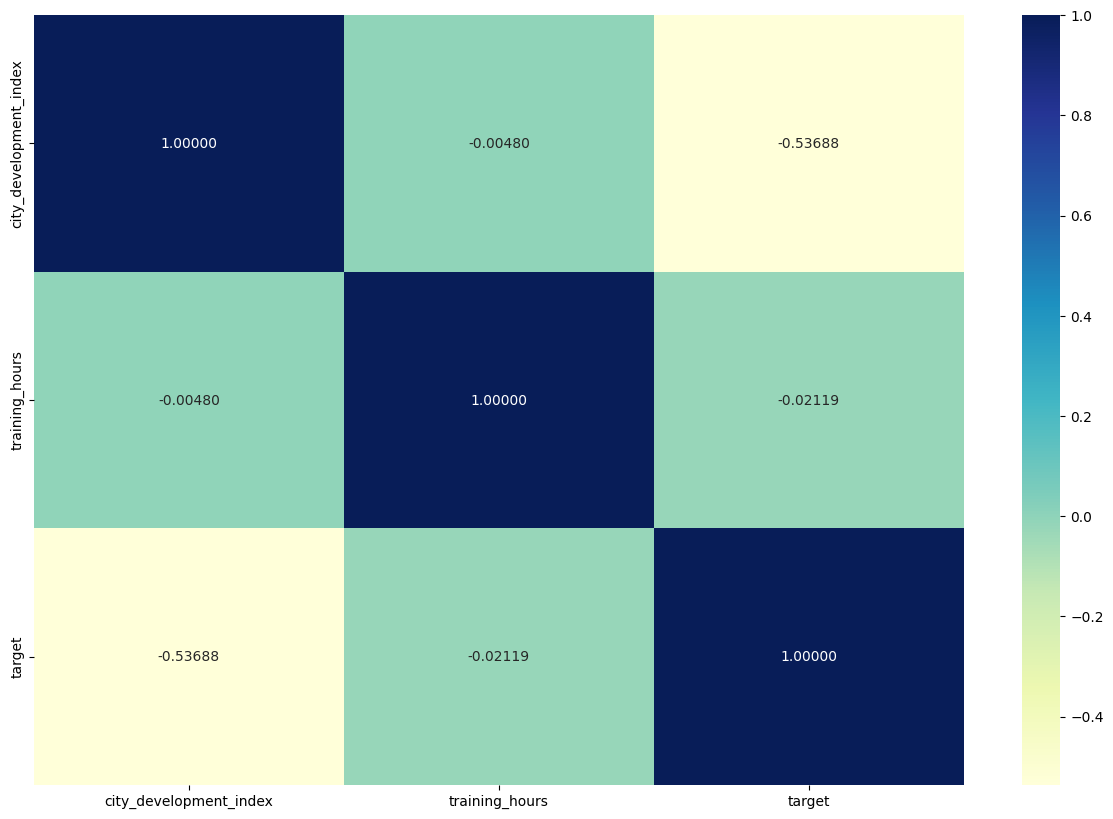

In [ ]:
# Plot the heatmap to see the correlation between numerical features and label
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt='.5f')
plt.show()

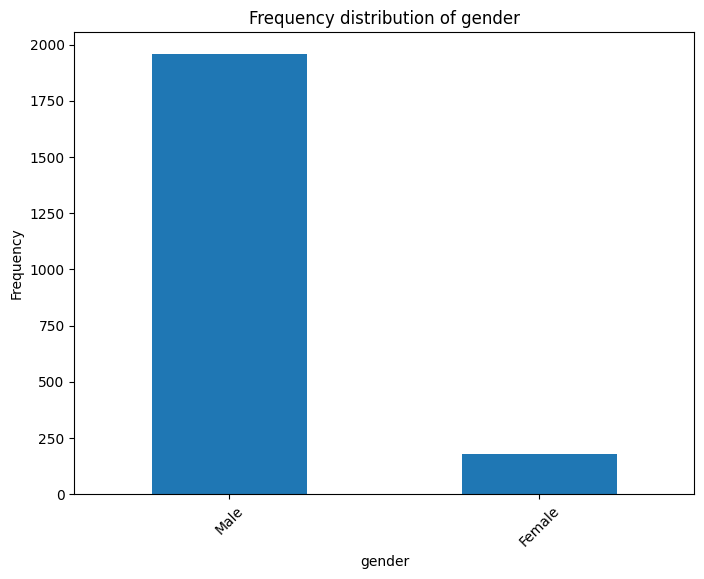

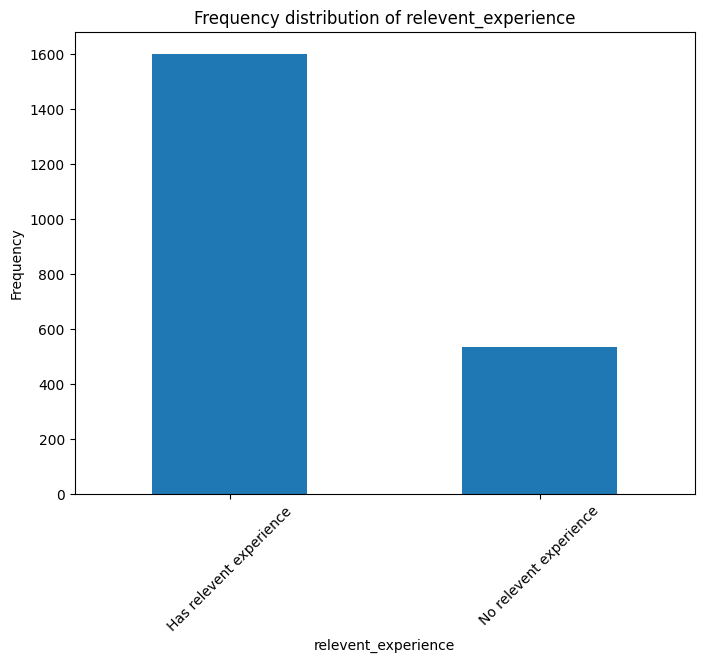

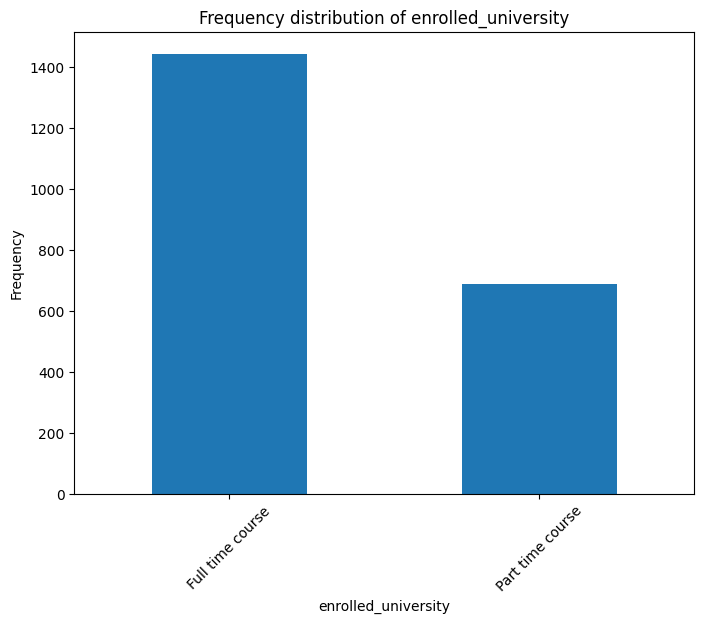

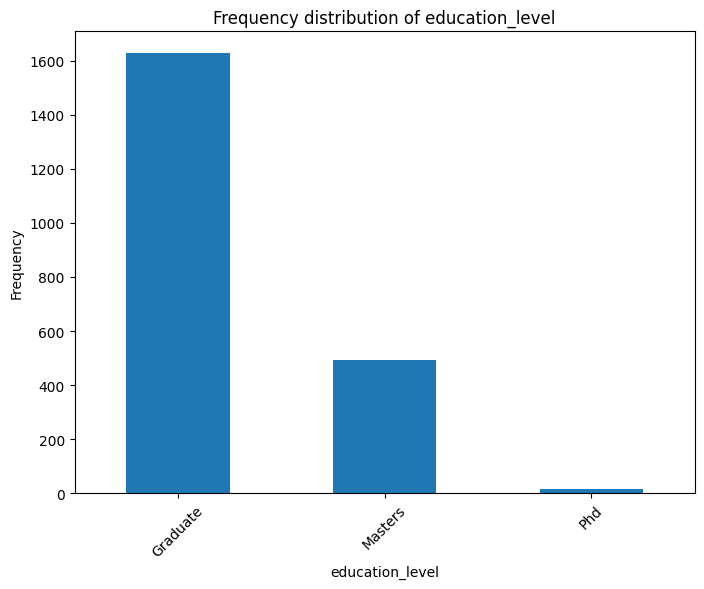

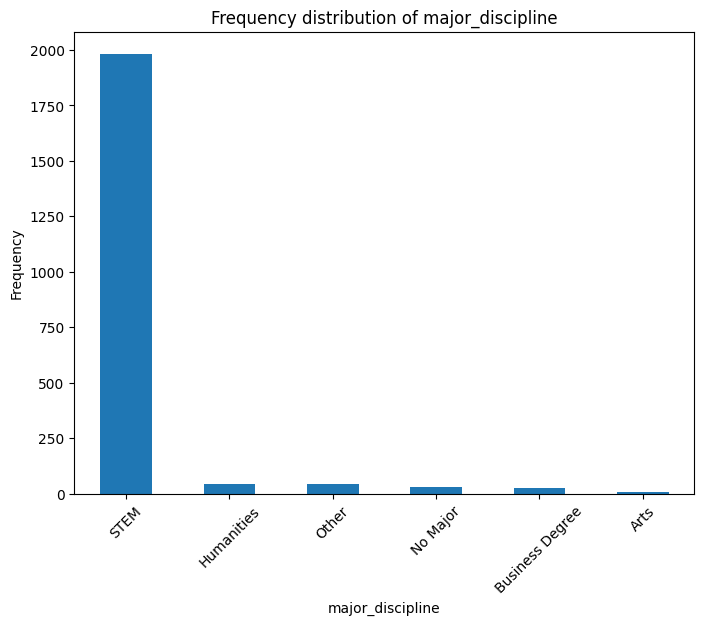

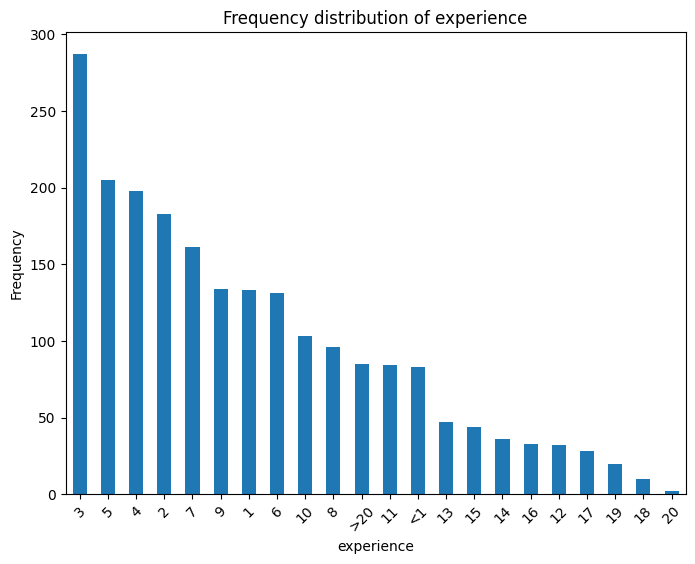

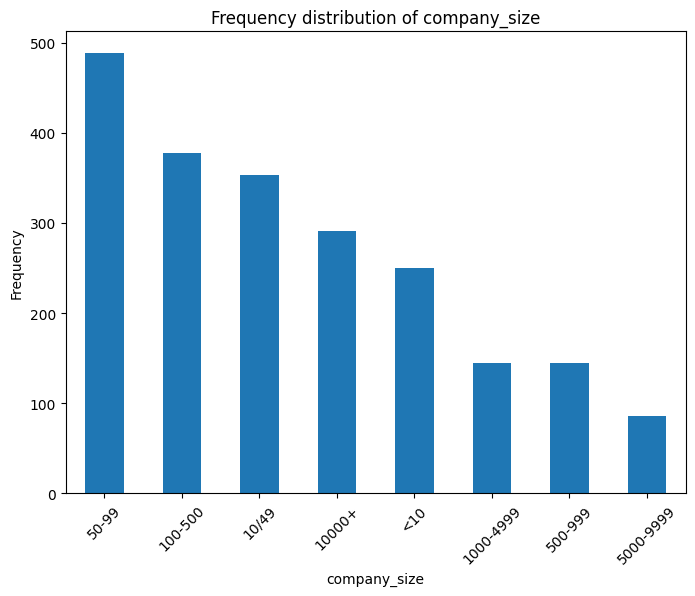

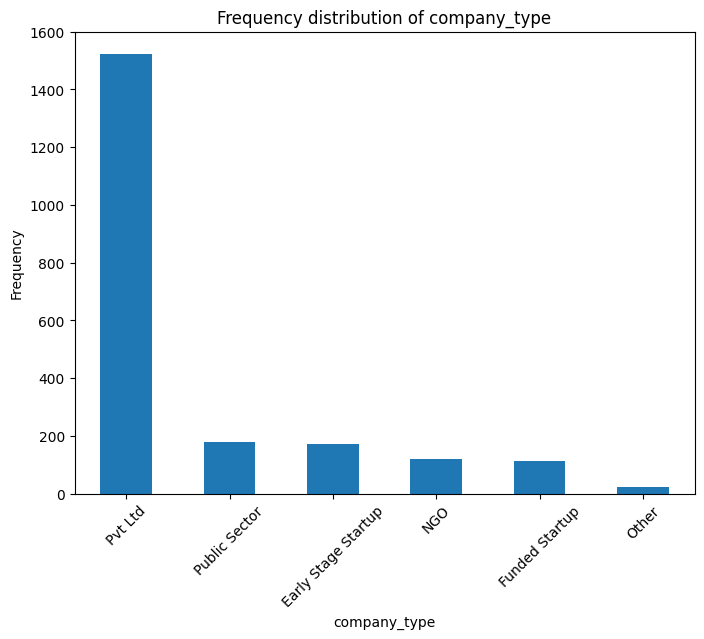

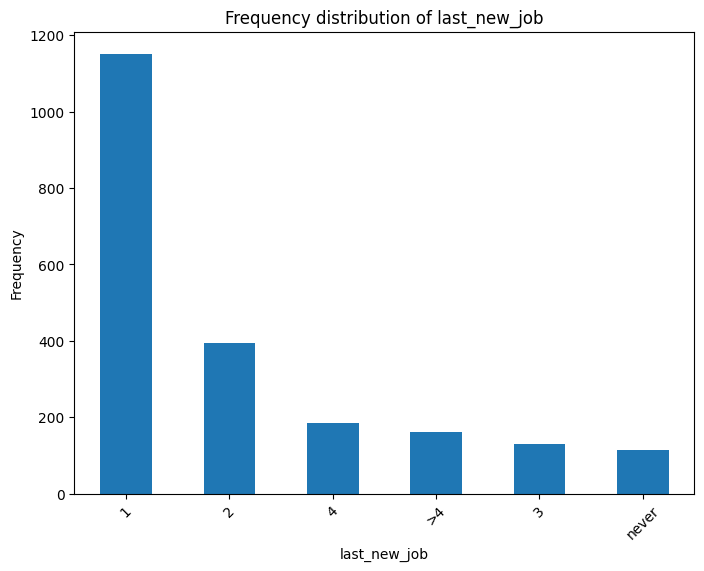

In [ ]:
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university','education_level', 'major_discipline', 'experience', 'company_size',
                  'company_type', 'last_new_job']
# Create bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Transform categorical variables to one-hot encoding variables
data = pd.get_dummies(data)

In [ ]:
# # Import library to encode categorical features
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# cat_cols = [col for col in data.columns if data[col].dtypes=="O"]
# # Encode categorical features
# for col in cat_cols:
#     data.loc[:, col] = encoder.fit_transform(data[col])

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,2135.0,0.756329,0.145332,0.45,0.624,0.743,0.91,1.026
training_hours,2135.0,65.296956,63.639919,-5.00,22.000,45.000,87.50,336.000
target,2135.0,0.515222,0.499885,0.00,0.000,1.000,1.00,1.000
gender_Female,2135.0,0.083372,0.276509,0.00,0.000,0.000,0.00,1.000
gender_Male,2135.0,0.916628,0.276509,0.00,1.000,1.000,1.00,1.000
relevent_experience_Has relevent experience,2135.0,0.749415,0.433452,0.00,0.000,1.000,1.00,1.000
relevent_experience_No relevent experience,2135.0,0.250585,0.433452,0.00,0.000,0.000,1.00,1.000
enrolled_university_Full time course,2135.0,0.676347,0.467979,0.00,0.000,1.000,1.00,1.000
enrolled_university_Part time course,2135.0,0.323653,0.467979,0.00,0.000,0.000,1.00,1.000
education_level_Graduate,2135.0,0.762061,0.425921,0.00,1.000,1.000,1.00,1.000


In [ ]:
# Drop the column 'target' because it is the data label
X = data.drop(columns=["target"])
# Assign data label to to variable 'y'
y = data.target

In [ ]:
# Load libraries
from sklearn.model_selection import train_test_split, GridSearchCV
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=1, test_size=0.2)

In [ ]:
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))

Before oversampling: (1708, 59)
(array([0., 1.]), array([836, 872]))


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=5)
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

In [ ]:
# Before oversampling
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))
# After oversampling
print("After oversampling: " + str(X_train_oversampling.shape))
print(np.unique(y_train_oversampling, return_counts=True))

Before oversampling: (1708, 59)
(array([0., 1.]), array([836, 872]))
After oversampling: (1744, 59)
(array([0., 1.]), array([872, 872]))


In [ ]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
params = {"criterion": ["gini", "entropy"],
         "max_depth": [3, 5],
         "min_samples_split": [4,8]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [ ]:
# Run the search on oversampled training data samples.
grid_search.fit(X_train_oversampling, y_train_oversampling)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [4, 8]})

In [ ]:
# Best set of hyper-parameters found after searching
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 8}

In [ ]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])

In [ ]:
# Train the decision tree model
model_dt.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       199
         1.0       0.84      0.86      0.85       228

    accuracy                           0.84       427
   macro avg       0.84      0.84      0.84       427
weighted avg       0.84      0.84      0.84       427



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],
         "max_depth": [6, 7, 9, 11],
         "min_samples_split": [5, 8, 12, 16]}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 5)
# Run the search on oversampled training data samples.
grid_search_rf.fit(X_train_oversampling, y_train_oversampling)     # Train the RandomForest

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10, n_jobs=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 9, 11],
                         'min_samples_split': [5, 8, 12, 16]})

In [ ]:
# Best set of hyper parameters of the Random Forest
grid_search_rf.best_params_

{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 12}

In [ ]:
# Build a Random Forest model pipeline from the best set of hyper-parameters found
model_rf = RandomForestClassifier(n_estimators=10, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initialize the RandomForest

In [ ]:
# Train the Random Forest model
model_rf.fit(X_train_oversampling, y_train_oversampling)

RandomForestClassifier(max_depth=11, min_samples_split=12, n_estimators=10,
                       random_state=1)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report
# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_rf.predict(X_test)
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       199
         1.0       0.88      0.87      0.87       228

    accuracy                           0.87       427
   macro avg       0.87      0.87      0.87       427
weighted avg       0.87      0.87      0.87       427



# Feature Important

city_development_index                         0.833736
training_hours                                 0.016168
gender_Female                                  0.000000
gender_Male                                    0.000000
relevent_experience_Has relevent experience    0.000000
relevent_experience_No relevent experience     0.000000
enrolled_university_Full time course           0.003761
enrolled_university_Part time course           0.005696
education_level_Graduate                       0.000000
education_level_Masters                        0.000000
education_level_Phd                            0.000000
major_discipline_Arts                          0.000000
major_discipline_Business Degree               0.000000
major_discipline_Humanities                    0.000000
major_discipline_No Major                      0.000000
major_discipline_Other                         0.000000
major_discipline_STEM                          0.000000
experience_1                                   0

<Axes: >

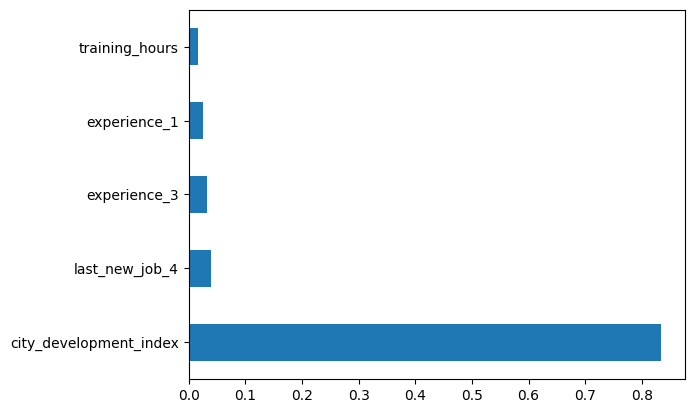

In [ ]:
# Print the importance level of each feature
weights = model_dt.feature_importances_
cols = X.columns
feature_importances = pd.Series(weights, index=cols)
print(feature_importances)
# Plot the five most important features
feature_importances.nlargest(5).plot(kind="barh")

# Visualize the tree

In [ ]:
#!pip install imblearn
#!pip install graphviz

In [ ]:
from sklearn import tree
from subprocess import call
tree.export_graphviz(
    decision_tree=model_dt,
    out_file='classification-tree.dot',
    feature_names=X.columns,
    filled=True,  # Fill nodes with colors
    rounded=True,  # Rounded corners for nodes
)
# Convert dot file to a PNG image
call(['dot', '-Tpng', 'classification-tree.dot', '-o', 'classification-tree.png', '-Gdpi=300'])

0

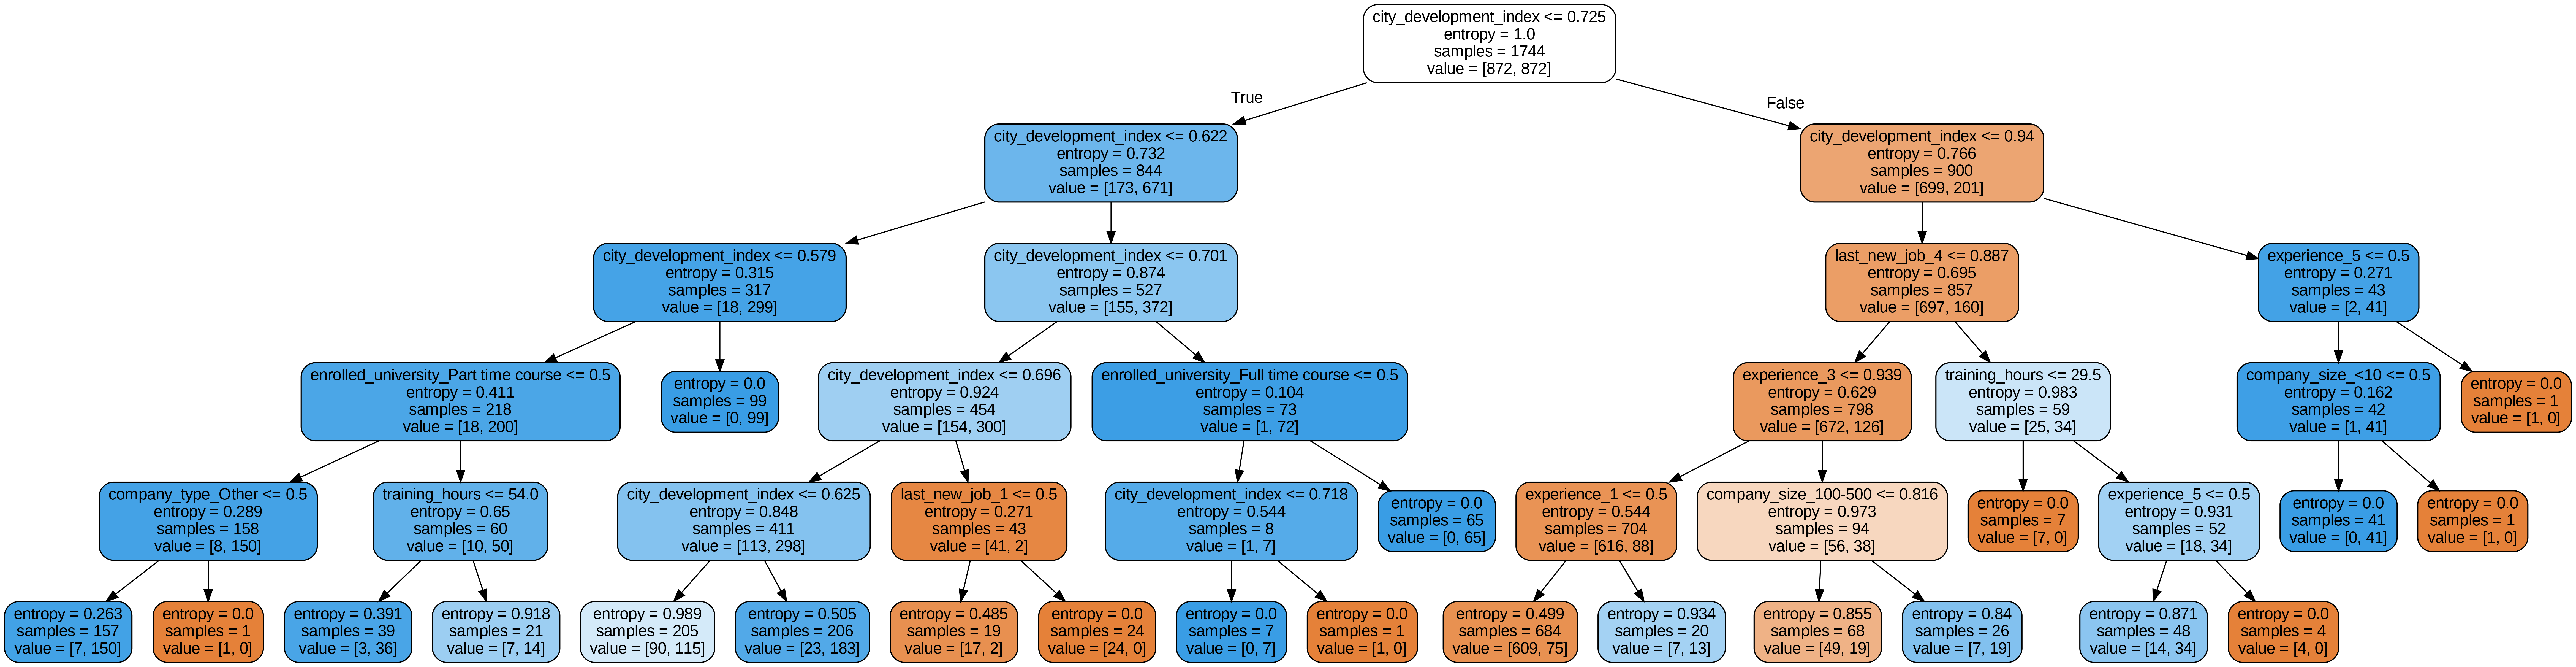

In [ ]:
from IPython.display import Image
Image(filename = 'classification-tree.png')